 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path_whale = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(file_path_whale, parse_dates=True, infer_datetime_format=True)
whale_data.set_index(pd.to_datetime(whale_data["Date"], infer_datetime_format=True), inplace=True)
whale_data.sort_index(ascending=True, inplace=True)
whale_data.drop(columns=["Date"], inplace=True)

In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna()
# Count nulls to verify they were dropped
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
file_path_algo = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(file_path_algo, parse_dates=True, infer_datetime_format=True)
algo_data.set_index(pd.to_datetime(algo_data["Date"], infer_datetime_format=True), inplace=True)
algo_data.sort_index(ascending=True, inplace=True)
algo_data.drop(columns=["Date"], inplace=True)

In [6]:
# Count algo_data.isnull().sum(),
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
file_path_spy = Path("Resources/sp500_history.csv")
spy_data = pd.read_csv(file_path_spy, parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
spy_data.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
# Convert Date to Datetime object
spy_data.set_index(pd.to_datetime(spy_data["Date"], infer_datetime_format=True), inplace=True)
spy_data.sort_index(ascending=True, inplace=True)
spy_data.drop(columns = ["Date"], inplace=True)

In [11]:
# Remove $ from prices to prep conversion to float and convert string to float
spy_data["Close"] = spy_data["Close"].str.replace("$", "")
spy_data["Close"] = spy_data["Close"].astype("float")

C:\Users\range\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [12]:
# Check data Types
spy_data.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
spy_daily_returns = spy_data.pct_change()

In [14]:
# Drop nulls
spy_daily_returns.dropna(inplace=True)
spy_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
spy_daily_returns = spy_daily_returns.rename( columns = 
    {"Close":"S&P500"})
spy_daily_returns

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_data, algo_data, spy_daily_returns], axis="columns", join="outer")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000872
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,0.003624
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007174
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.000322
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.003457


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Returns (%)'>

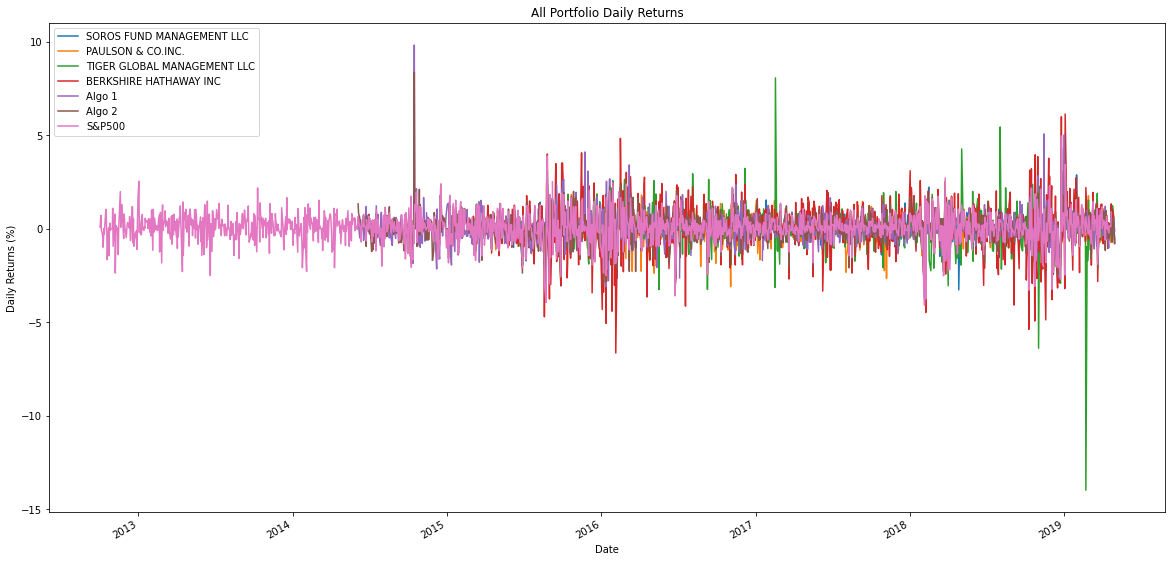

In [17]:
# Plot daily returns of all portfolios
(all_returns*100).plot(title="All Portfolio Daily Returns", ylabel="Daily Returns (%)", figsize=(20, 10))

#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
all_returns_cumulative_return = (1+all_returns).cumprod()

<AxesSubplot:title={'center':"All Portfolio's Cumulative Returns"}, xlabel='Date', ylabel='Cumulative Returns (%)'>

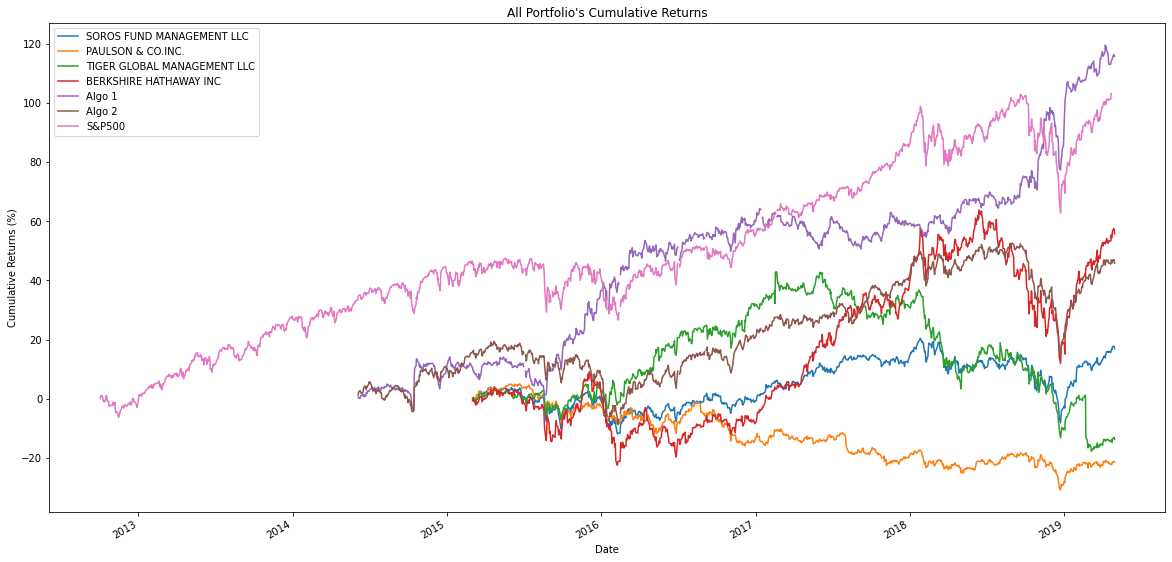

In [19]:
# Plot cumulative returns
((all_returns_cumulative_return-1)*100).plot(title="All Portfolio's Cumulative Returns", ylabel="Cumulative Returns (%)", figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':"Algo Portfolio's Riskiness"}, ylabel='Returns (%)'>

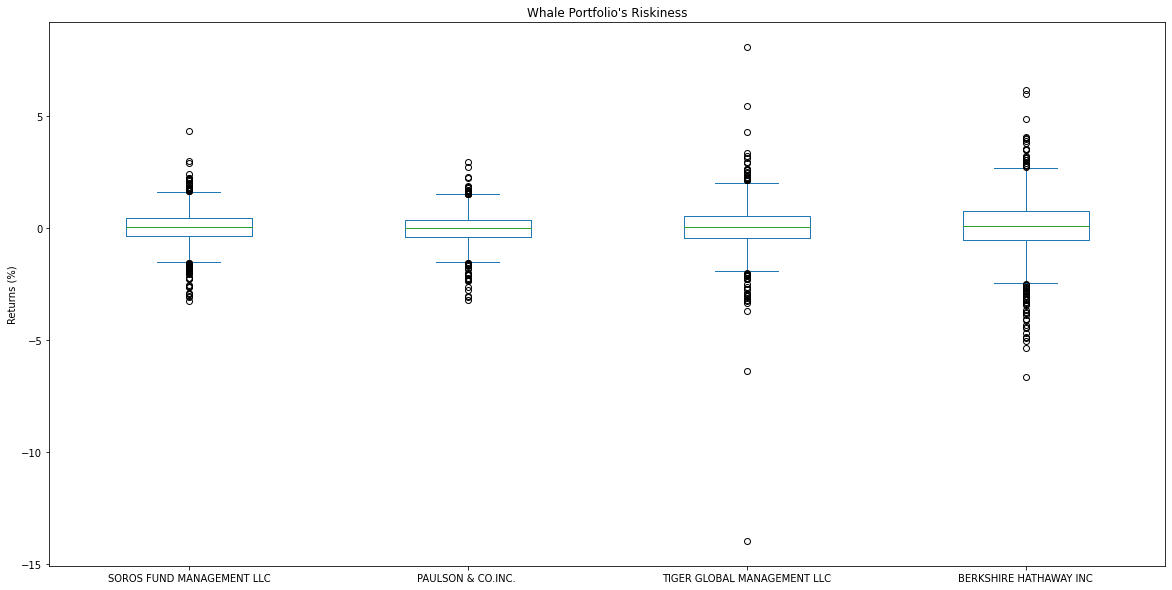

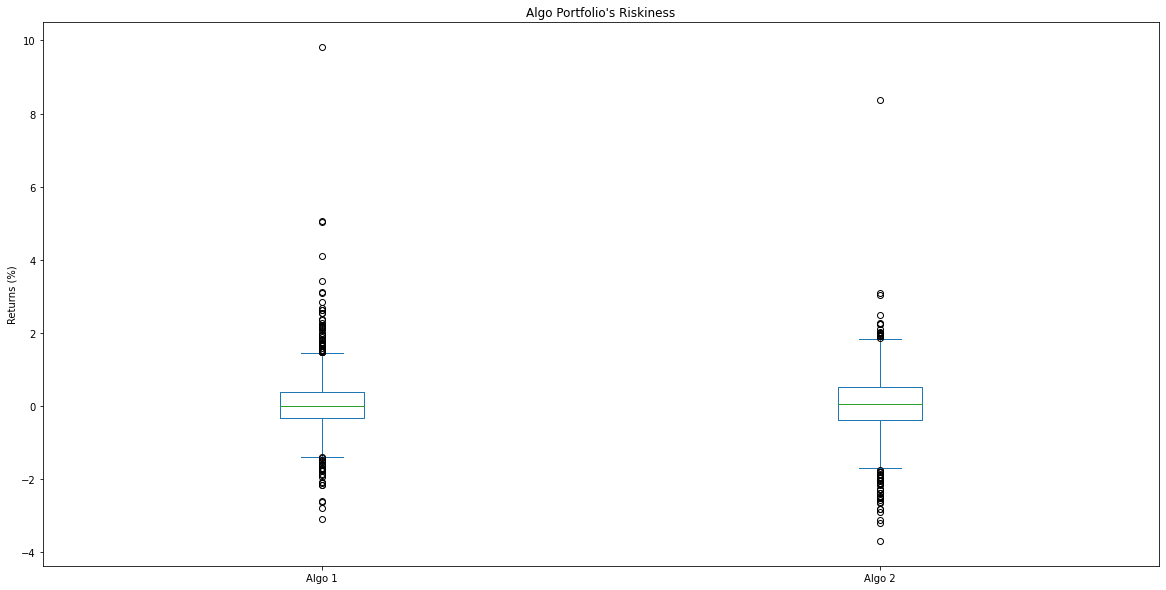

In [20]:
# Box plot to visually show risk
(whale_data*100).plot(kind="box", title="Whale Portfolio's Riskiness", ylabel="Returns (%)", figsize=(20, 10))
(algo_data*100).plot(kind="box", title="Algo Portfolio's Riskiness", ylabel="Returns (%)", figsize=(20, 10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = all_returns.std()
all_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
spy_std = float(spy_daily_returns.std())
print(spy_std)
# Determine which portfolios are riskier than the S&P 500
# Initalize a list to hold the portfolios
risky_portfolios = []
# Loop thru each portfolio, if riskier then spy then add it to the list
for key, value in all_returns_std.items():
    if value > spy_std:
        risky_portfolios.append(key)
# Print out risky portfolios
print(f"Portfolios that have a higher standard deviation than the S&P500 are: {risky_portfolios}.")

0.008111270297036554
Portfolios that have a higher standard deviation than the S&P500 are: ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 2'].


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
all_returns_std_annualized = all_returns_std * np.sqrt(252)
all_returns_std_annualized

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
S&P500                         0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_std_21_rolling = all_returns.rolling(window=21).std()
all_returns_std_21_rolling

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,NaN
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,NaN
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,NaN


<AxesSubplot:title={'center':"All Portfolio's 21-Day Rolling Standard Deviation"}, xlabel='Date', ylabel='21 Day Rolling S.D. (%)'>

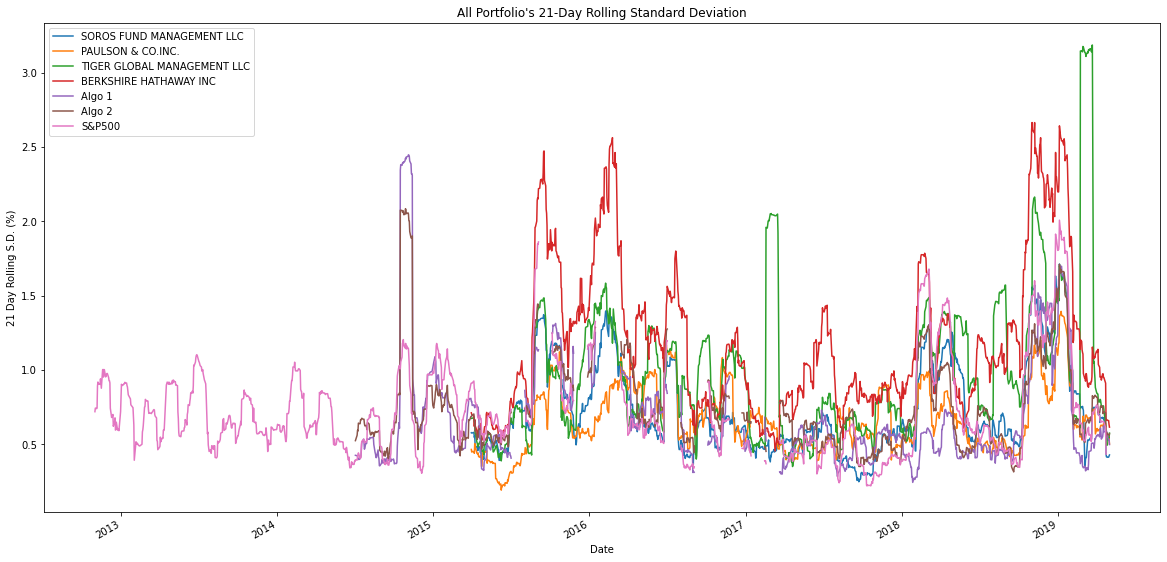

In [25]:
# Plot the rolling standard deviation
(all_returns_std_21_rolling*100).plot(title="All Portfolio's 21-Day Rolling Standard Deviation", ylabel="21 Day Rolling S.D. (%)", figsize=(20, 10))

correlation = all_returns.corr()

Correlating All Portfolio's Returns


<AxesSubplot:>

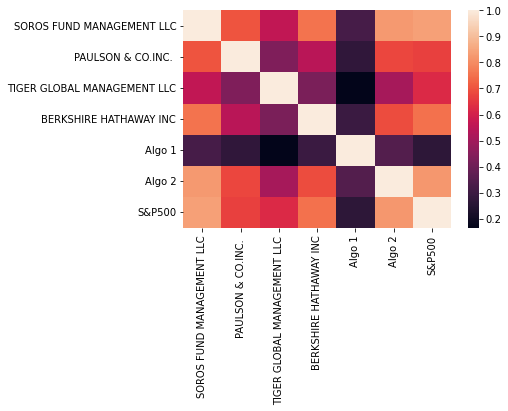

In [26]:
# Calculate the correlation
correlation = all_returns.corr()
# Display de correlation matrix
print("Correlating All Portfolio's Returns")
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date', ylabel='Beta'>

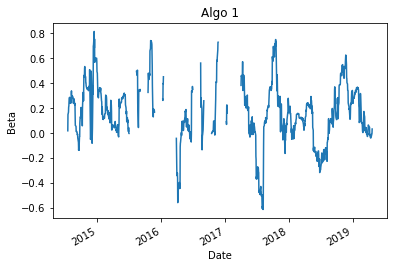

In [27]:
# Calculate covariance of a single portfolio
algo1_covariance = all_returns["Algo 1"].cov(all_returns["S&P500"])
# Calculate variance of S&P 500
variance = all_returns["S&P500"].var()
# Computing beta
algo1_beta = algo1_covariance/variance
# Plot beta trend
# Calculate 30-day rolling covariance of Algo1 and S&P500, and S&P500 30-day rolling Variance
rolling_algo1_covariance = all_returns["Algo 1"].rolling(window=30).cov(all_returns['S&P500'])
rolling_spy_variance = all_returns['S&P500'].rolling(window=30).var()
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_algo1_beta = rolling_algo1_covariance / rolling_spy_variance
rolling_algo1_beta.plot(title="Algo 1", ylabel="Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21-Day Standard Deviation EWMA of All Portfolios'}, xlabel='Date', ylabel='21-Day EWMA S.D. (%)'>

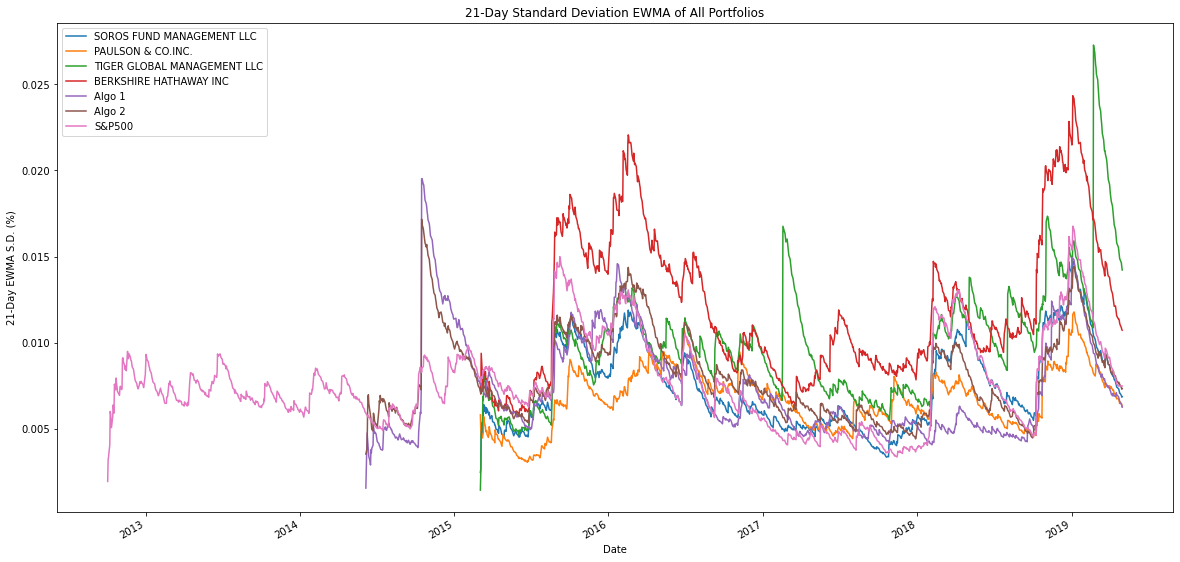

In [28]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().plot(title="21-Day Standard Deviation EWMA of All Portfolios", ylabel="21-Day EWMA S.D. (%)", figsize=(20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean()-all_returns['S&P500'].mean())*252) / (all_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.575575
PAULSON & CO.INC.             -1.515474
TIGER GLOBAL MANAGEMENT LLC   -0.797198
BERKSHIRE HATHAWAY INC         0.046861
Algo 1                         0.380133
Algo 2                        -0.228760
S&P500                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}, ylabel='Sharpe Ratio'>

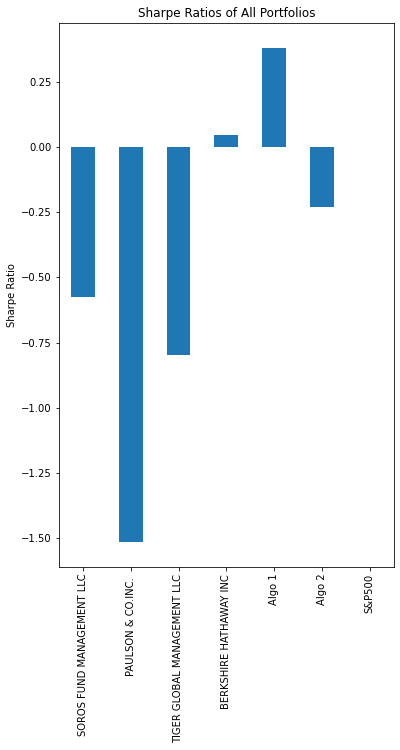

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of All Portfolios", ylabel="Sharpe Ratio", figsize=(6, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

#### Write your answer here!
##### Algo 1 outperformed the S&P500 & the Whale's portfolios while maintaining the lowest downside volatility of all portfolios.
##### Algo 2 underperfomed the S&P500 & outperformed most of the Whale's portfolios except Berkshire Hathaway Inc. Algo 2 also maintained low downside volatility.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
file_path_bp = Path("Resources/bp_data.csv")
bp_data = pd.read_csv(file_path_bp, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [32]:
# Reading data from 2nd stock
file_path_jnug = Path("Resources/jnug_data.csv")
jnug_data = pd.read_csv(file_path_jnug, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [33]:
# Reading data from 3rd stock
file_path_tsla = Path("Resources/tsla_data.csv")
tsla_data = pd.read_csv(file_path_tsla, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [34]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([bp_data, jnug_data, tsla_data], axis="columns", join="inner")
my_portfolio

,Close,Close,Close
Date,,,
2015-07-01,39.27,1671.0,53.83
2015-07-02,41.29,1778.0,56.00
2015-07-06,39.91,1759.0,55.94
2015-07-07,39.71,1495.0,53.58
2015-07-08,39.15,1391.0,50.99
...,...,...,...
2019-03-25,43.53,577.5,52.08
2019-03-26,43.82,577.5,53.55
2019-03-27,43.59,548.0,54.97


In [35]:
# Reset Date index
#my_portfolio.reset_index(inplace=True)

In [36]:
# Reorganize portfolio data by having a column per symbol
col = ["BP", "JNUG", "TSLA"]
my_portfolio.columns = col
my_portfolio

,BP,JNUG,TSLA
Date,,,
2015-07-01,39.27,1671.0,53.83
2015-07-02,41.29,1778.0,56.00
2015-07-06,39.91,1759.0,55.94
2015-07-07,39.71,1495.0,53.58
2015-07-08,39.15,1391.0,50.99
...,...,...,...
2019-03-25,43.53,577.5,52.08
2019-03-26,43.82,577.5,53.55
2019-03-27,43.59,548.0,54.97


In [37]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()
# Drop NAs
my_portfolio_returns.dropna(inplace=True)
# Display sample data
my_portfolio_returns.sample(5)

,BP,JNUG,TSLA
Date,,,
2016-04-14,-0.014659,-0.093106,-0.010607
2016-11-25,-0.003779,-0.004666,0.018121
2016-06-02,0.005743,0.003574,-0.002733
2016-09-02,0.024955,0.176114,-0.014695
2015-11-30,-0.006604,0.027834,-0.005829


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
my_portfolio_returns_weighted = my_portfolio_returns.dot(weights)
# Display sample data
my_portfolio_returns_weighted.sample(5)

Date
2015-12-31    0.003313
2015-12-21    0.015641
2016-10-18    0.061860
2018-02-28   -0.016513
2018-09-26   -0.005146
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([all_returns, my_portfolio_returns_weighted], axis="columns", join="outer")
all_portfolios = all_portfolios.rename(columns={ 0 : "My Portfolio"})
all_portfolios.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2018-05-31,-0.008054,-0.006034,-0.017407,0.002284,0.003673,-0.004673,-0.006880,-0.017156
2018-05-07,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458,0.007083
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,NaN,NaN
2017-06-29,-0.007636,-0.006521,-0.018407,-0.022065,0.006589,-0.004264,-0.008600,-0.034464
2014-12-12,NaN,NaN,NaN,NaN,-0.010493,-0.006198,-0.016214,NaN
2018-08-02,0.002427,-0.000982,0.002729,0.009181,-0.000459,0.004759,0.004923,0.038093
2019-01-25,0.012897,0.010722,0.007476,0.021190,0.000384,0.010659,0.008489,0.039758
2014-12-18,NaN,NaN,NaN,NaN,0.002200,0.014153,0.024015,NaN
2016-08-26,0.001922,0.001669,-0.006806,0.002513,-0.000889,0.001219,-0.001579,-0.010434


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace=True)
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308,0.051928
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862,-0.015060
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,-0.065762
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.044002
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.013991
...,...,...,...,...,...,...,...,...
2019-03-25,-0.003330,-0.000420,0.000972,0.010737,0.000973,-0.002058,-0.000839,0.014404
2019-03-26,0.004387,0.005641,0.009190,0.005378,0.005455,0.005614,0.007183,0.011629
2019-03-27,-0.003994,-0.007321,-0.004278,-0.006041,0.008395,-0.004457,-0.004644,-0.009938


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
all_portfolios_annualized_std = all_portfolios.std()*np.sqrt(252)
all_portfolios_annualized_std

SOROS FUND MANAGEMENT LLC      0.129048
PAULSON & CO.INC.              0.115321
TIGER GLOBAL MANAGEMENT LLC    0.179690
BERKSHIRE HATHAWAY INC         0.213050
Algo 1                         0.123988
Algo 2                         0.135774
S&P500                         0.138519
My Portfolio                   0.477103
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':"All Portfolio's 21-Day Rolling Standard Deviations"}, xlabel='Date', ylabel='21-Day Rolling S.D. (%)'>

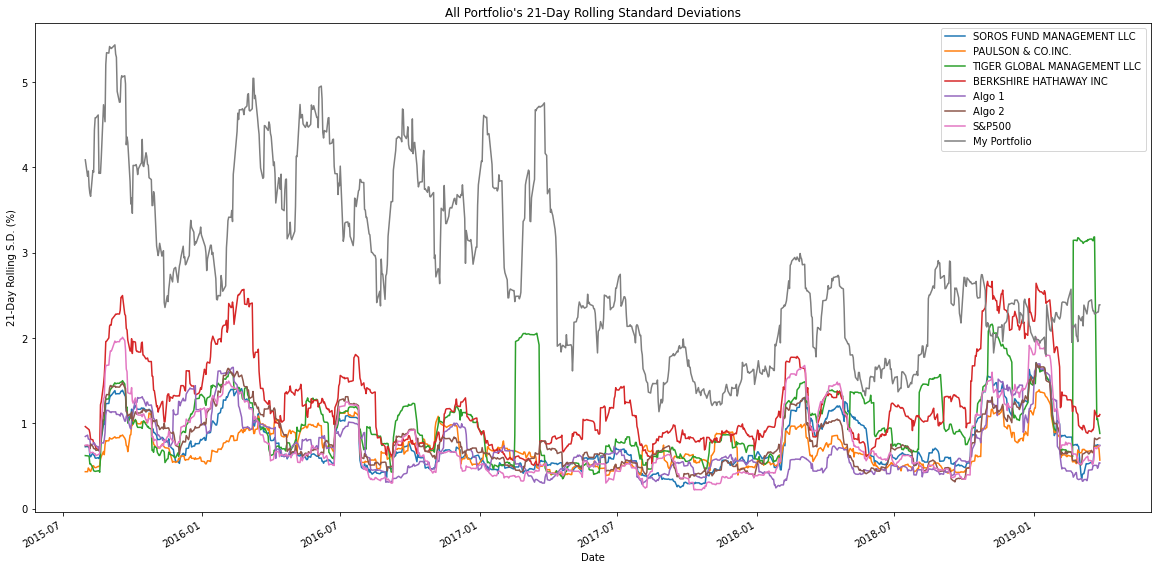

In [42]:
# Calculate rolling standard deviation
all_portfolios_rolling_std = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
(all_portfolios_rolling_std*100).plot(title="All Portfolio's 21-Day Rolling Standard Deviations", ylabel="21-Day Rolling S.D. (%)", figsize=(20, 10))

### Calculate and plot the correlation

Correlating My Portfolio


<AxesSubplot:>

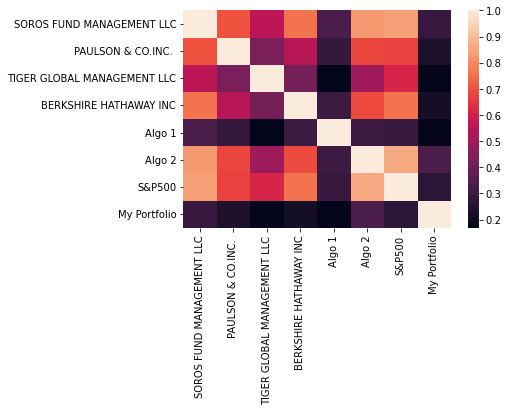

In [43]:
# Calculate and plot the correlation
my_correlation = all_portfolios.corr()
print("Correlating My Portfolio")
sns.heatmap(my_correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

0.9148710481032475


<AxesSubplot:title={'center':"My Portfolio's 30-Day Rolling Beta"}, xlabel='Date', ylabel='Beta'>

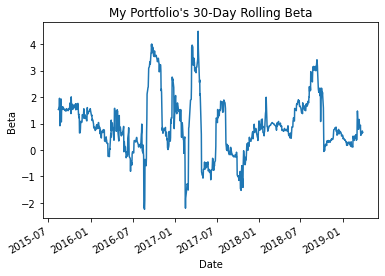

In [44]:
# Calculate and plot Beta
# First, plot covariance & variance to get beta
my_portfolio_covariance = all_portfolios["My Portfolio"].cov(all_portfolios["S&P500"])
my_portfolio_spy_variance = all_portfolios["S&P500"].var()
my_portfolio_beta = my_portfolio_covariance/my_portfolio_spy_variance
print(my_portfolio_beta)
# Second, calculate 30-day rolling covariance & S&P500 30-day rolling Variance
rolling_my_portfolio_covariance = all_portfolios["My Portfolio"].rolling(window=30).cov(all_portfolios['S&P500'])
rolling_my_portfolio_spy_variance = all_portfolios['S&P500'].rolling(window=30).var()
# Calculate 30-day rolling beta & plot
rolling_my_portfolio_beta = rolling_my_portfolio_covariance / rolling_my_portfolio_spy_variance
rolling_my_portfolio_beta.plot(ylabel="Beta", title = "My Portfolio's 30-Day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
my_portfolio_sharpe_ratios = ((all_portfolios.mean() - all_portfolios["S&P500"].mean())*252) / (all_portfolios.std()*np.sqrt(252))
my_portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.432027
PAULSON & CO.INC.             -1.438544
TIGER GLOBAL MANAGEMENT LLC   -0.676452
BERKSHIRE HATHAWAY INC         0.190879
Algo 1                         0.735228
Algo 2                        -0.189224
S&P500                         0.000000
My Portfolio                   0.254686
dtype: float64

<AxesSubplot:title={'center':"All Portfolio's Sharpe Ratios"}, ylabel='Sharpe Ratios'>

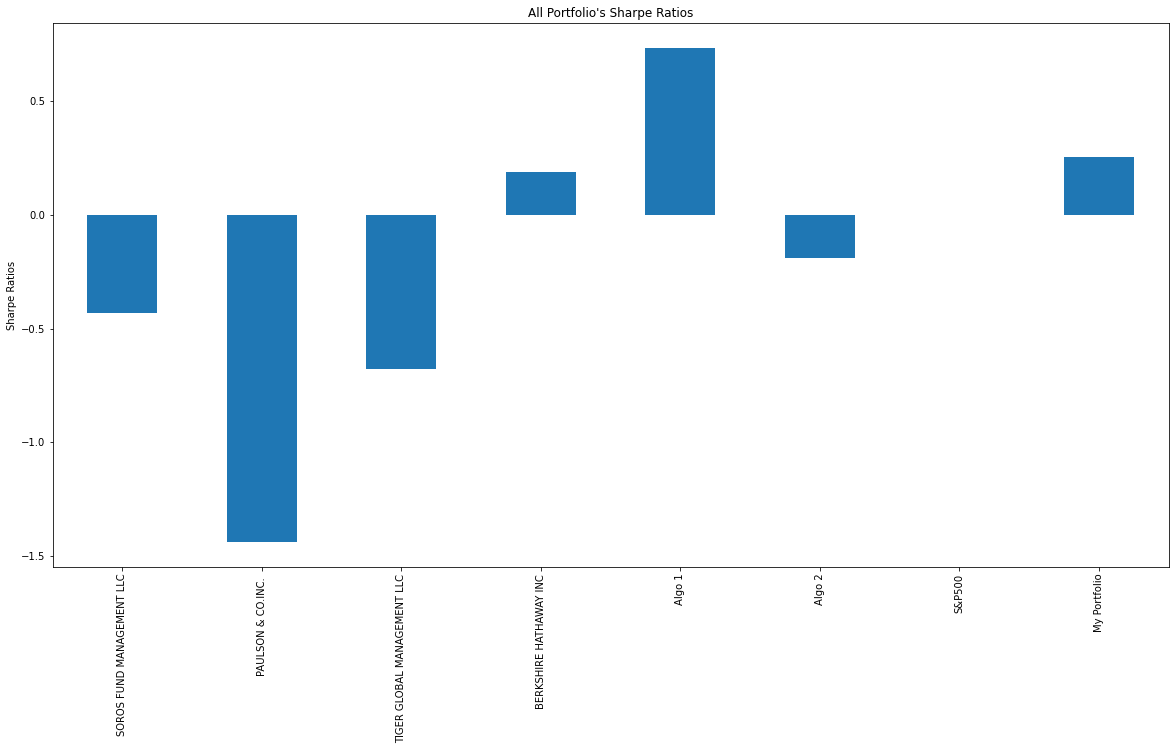

In [46]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_sharpe_ratios.plot(kind="bar", title="All Portfolio's Sharpe Ratios", ylabel="Sharpe Ratios", figsize=(20, 10))

### How does your portfolio do?

#### Write your answer here!
##### My portfolio's returns outperformed most returns, but had a high standard deviation making it the very risky. 

<AxesSubplot:title={'center':"All Portfolio's Cumulative Returns"}, xlabel='Date', ylabel='Cumulative Returns (%)'>

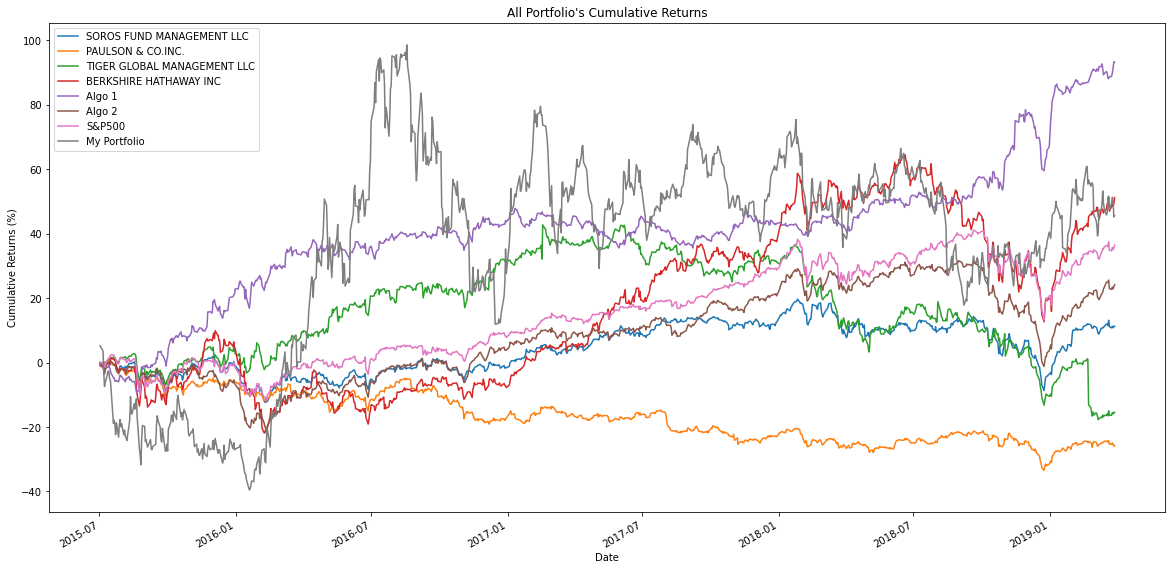

In [47]:
_cumulative_return = (1+all_portfolios).cumprod()
((_cumulative_return-1)*100).plot(title="All Portfolio's Cumulative Returns", ylabel="Cumulative Returns (%)", figsize=(20, 10))